In [29]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import hist
from hist import Hist
import mplhep as hep
import math
import scipy
from scipy.signal import peak_widths

genkt = uproot.open("/home/submit/marinamn/fccee/FCCAnalyzer/tmp/output_z_xsec_qq_genkt.root")
kt = uproot.open("/home/submit/marinamn/fccee/FCCAnalyzer/tmp/output_z_xsec_qq_kt.root")
valencia = uproot.open("/home/submit/marinamn/fccee/FCCAnalyzer/tmp/output_z_xsec_qq_valencia.root")

(0.0, 100.0)

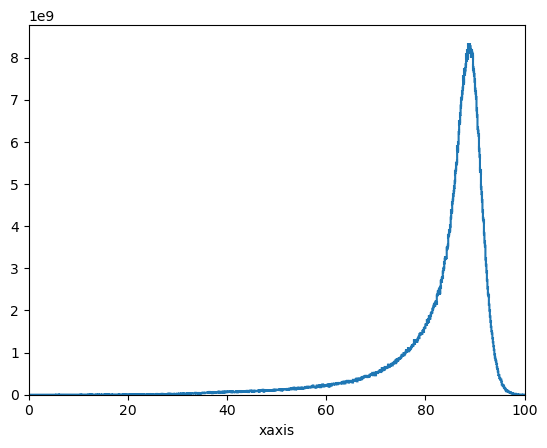

In [60]:
genkt_mass = genkt['p8_ee_Zcc_ecm91/dijet_m;1'].to_hist()
hep.histplot(genkt_mass)
plt.xlim(0,100)

9203200716.0
890
0.9773041550516912
4601600358.0
[[854]
 [855]
 [917]] [[0.93779495]
 [0.93889243]
 [1.00693606]]
[0.06914111]


(0.0, 1.2)

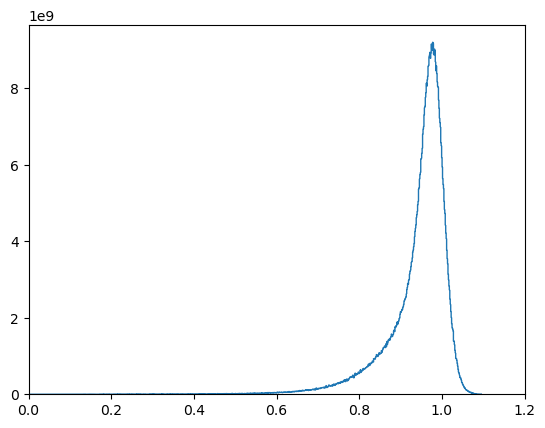

In [65]:
genkt_e = genkt['p8_ee_Zcc_ecm91/sum_e;1'].to_hist()

ye,xe = genkt_e.to_numpy()
xnew = genkt_e.axes[0].centers/91.118
maximum = max(ye)
index = np.argmax(ye)
peak = xnew[index]
print(maximum)
print(index)
print(peak)

half_max = maximum/2
print(half_max)
sides_index = np.argwhere(abs(ye - half_max) < 150000000)
sides = xnew[sides_index]
print(sides_index, sides)
genkt_jer = sides[2] - sides[0]
print(genkt_jer)

plt.stairs(ye[:-1],xnew)
plt.xlim(0,1.2)

In [59]:
numerator = 0
denominator = sum(ye)

for i in range(0,len(xnew)):
    numerator += xnew[i]*ye[i]
    
mean = numerator/denominator
num2 = 0

for i in range(0,len(xnew)):
    num2 += (xnew[i]-mean)**2

std = np.sqrt(num2/(denominator-1))
print(mean, std)

0.9412780169254185 1.8039446783125705e-05


(0.0, 100.0)

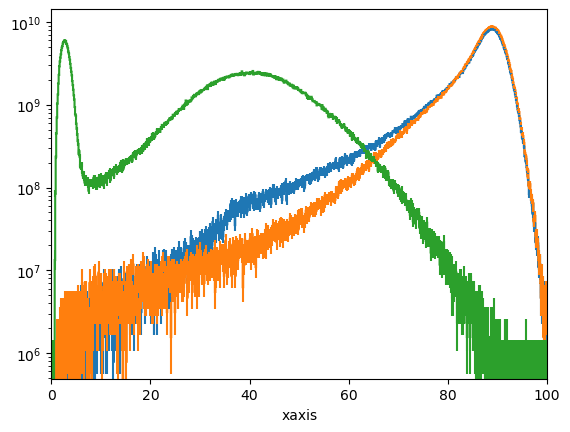

In [28]:
kt_mass = kt['p8_ee_Zcc_ecm91/dijet_m;1'].to_hist()
valencia_mass = valencia['p8_ee_Zcc_ecm91/dijet_m;1'].to_hist()

hep.histplot([genkt_mass, kt_mass, valencia_mass])
plt.yscale("log")
plt.xlim(0,100)